<a href="https://colab.research.google.com/github/MaximilianoVM/OPTICS-LAB-2023-1/blob/main/3_LabOptica_DFocalesEsfericos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import math 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Si y So 

In [22]:
   #So:Si

s = {115: (10.1, 10.6), 
     110: (10.2, 11.1), 
     105: (10.4, 10.9), 
     100: (10.3, 11.1), 
     95 : (10.2, 11.2), 
     90 : (10.6, 11.5),
     85 : (10.7, 11.5),
     80 : (10.8, 11.5),
     75 : (11  , 11.6),
     70 : (10.9, 11.8),
     65 : (11.2, 11.8),
     60 : (11.3, 12  ),
     55 : (11.3, 12.4),
     50 : (11.5, 12.6), #es claro durante un intervalo mas grande
     45 : (11.7, 12.9),
     40 : (12.2, 13.5),
     35 : (12.5, 14.5),
     30 : (13.4, 15.2),
     25 : (15  , 16.5)

     
     }



so = np.array( list(s.keys()) )

si_vect = np.array( list(s.values()) )

si_means = np.array([np.mean(v) for v in si_vect])

print(si_means)


[10.35 10.65 10.65 10.7  10.7  11.05 11.1  11.15 11.3  11.35 11.5  11.65
 11.85 12.05 12.3  12.85 13.5  14.3  15.75]


In [23]:
si_means

array([10.35, 10.65, 10.65, 10.7 , 10.7 , 11.05, 11.1 , 11.15, 11.3 ,
       11.35, 11.5 , 11.65, 11.85, 12.05, 12.3 , 12.85, 13.5 , 14.3 ,
       15.75])

In [25]:
so

array([115, 110, 105, 100,  95,  90,  85,  80,  75,  70,  65,  60,  55,
        50,  45,  40,  35,  30,  25])

###======= errores


In [26]:
error = np.array([ (x[1]-x[0])/2 for x in si_vect ])

errordf = pd.DataFrame({'si':si_means , 'incertidumbre_si': error })


disp_f = abs( ( so/(si_means + so) )**2 ) * error

errordf['incertidumbre_f'] = disp_f

errordf

,si,incertidumbre_si,incertidumbre_f
0,10.35,0.25,0.210420
1,10.65,0.45,0.374062
2,10.65,0.25,0.206076
3,10.70,0.40,0.326411
4,10.70,0.50,0.403894
5,11.05,0.45,0.356964
6,11.10,0.40,0.312933
7,11.15,0.35,0.269609
8,11.30,0.30,0.226580
9,11.35,0.45,0.333191


In [31]:
errordf['incertidumbre_f'].mean()

0.32472518949161266

# 1/Si y 1/So

In [7]:
si_1 = 1/si_means
so_1 = 1/so

#========= Tabla =========

In [8]:
df1 = pd.DataFrame({'si': si_means, 'so': so, '1/si': si_1, '1/so': so_1})

In [9]:
df1

,si,so,1/si,1/so
0,10.35,115,0.096618,0.008696
1,10.65,110,0.093897,0.009091
2,10.65,105,0.093897,0.009524
3,10.70,100,0.093458,0.010000
4,10.70,95,0.093458,0.010526
5,11.05,90,0.090498,0.011111
6,11.10,85,0.090090,0.011765
7,11.15,80,0.089686,0.012500
8,11.30,75,0.088496,0.013333
9,11.35,70,0.088106,0.014286


#========= graficas sin ajuste =========

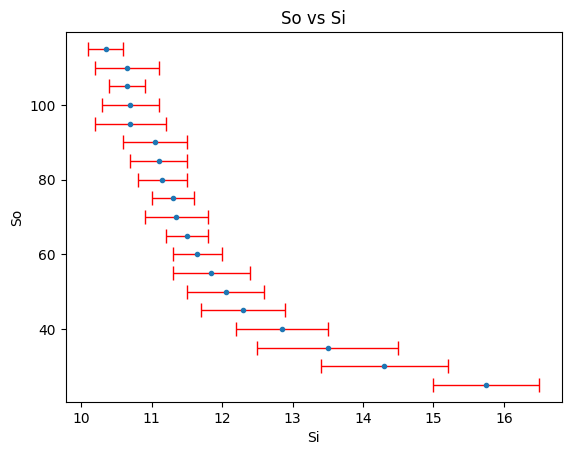

In [27]:
#error = np.array([ (x[1]-x[0])/2 for x in si_vect ])

# Create the scatter plot and plot the error bars
plt.errorbar(df1['si'], df1['so'], xerr=errordf['incertidumbre_si'], fmt='o', markersize=3, capsize=5, ecolor='red', elinewidth=1, capthick=1)

plt.xlabel('Si')
plt.ylabel('So')
plt.title('So vs Si')

plt.show()

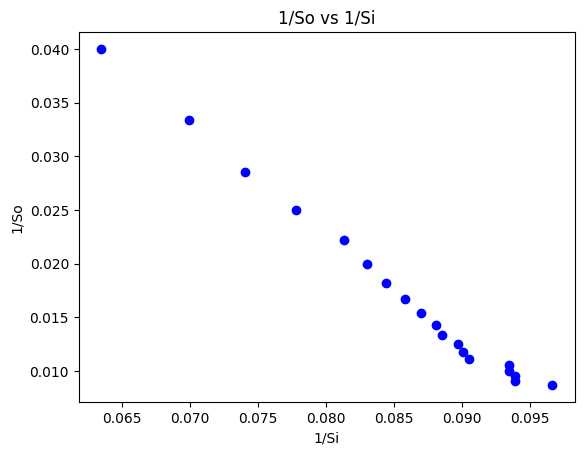

In [33]:
plt.plot(df1['1/si'], df1['1/so'], 'bo')

#error2 = np.array([ ((x[1]-x[0])/2) for x in si_vect ])

# Create the scatter plot and plot the error bars
#plt.errorbar(df1['1/si'], df1['1/so'], yerr=np.sqrt(errordf['incertidumbre_f']), fmt='o', markersize=3, capsize=5, ecolor='red', elinewidth=1, capthick=1)

plt.xlabel('1/Si')
plt.ylabel('1/So')
plt.title('1/So vs 1/Si')

plt.show()


#========= ajuste lineal para los inversos =========


In [12]:
#Realizar el ajuste lineal y mostrar los resultados
L_slope, L_intercept, L_r_value, L_p_value, L_std_err = linregress(df1['1/si'], df1['1/so'])

print('Pendiente:', L_slope)
print('Intersección:', L_intercept)
print('Coeficiente de correlación:', L_r_value)
print('Valor p:', L_p_value)
print('Error estándar:', L_std_err)

Pendiente: -0.9945914268231367
Intersección: 0.10244172947069777
Coeficiente de correlación: -0.9951204422041516
Valor p: 1.5247686431159849e-18
Error estándar: 0.023917698958350674


##========= grafica con ajuste para los inversos

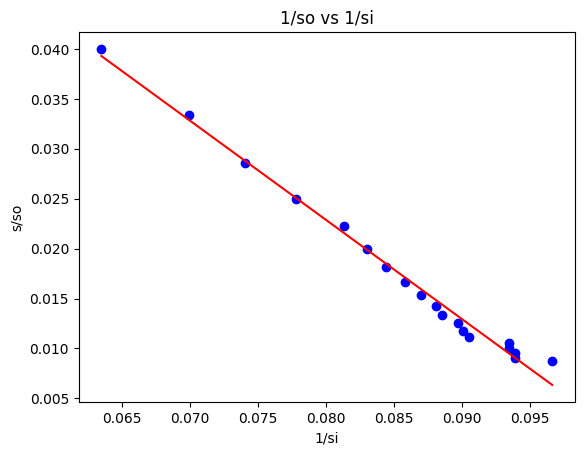

In [13]:
error = np.array([ y[1]-y[0] for y in si_vect ])



plt.plot(df1['1/si'], df1['1/so'], 'bo')
plt.plot(df1['1/si'], L_slope*df1['1/si']+L_intercept, #y = mb + b
            'r-', label='Ajuste lineal')

#plt.errorbar(df1['1/si'], df1['1/so'], yerr=error, fmt='none')



#=====

plt.xlabel('1/si')
plt.ylabel('s/so')
plt.title('1/so vs 1/si')
plt.show()

#EJEMPLO BARRAS DE ERROR

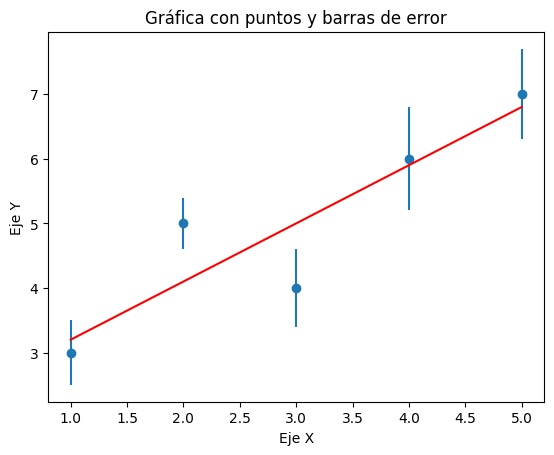

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 4, 6, 7])
error = np.array([0.5, 0.4, 0.6, 0.8, 0.7])

plt.scatter(x, y)
plt.errorbar(x, y, yerr=error, fmt='none')

slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color='red')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfica con puntos y barras de error')

plt.show()


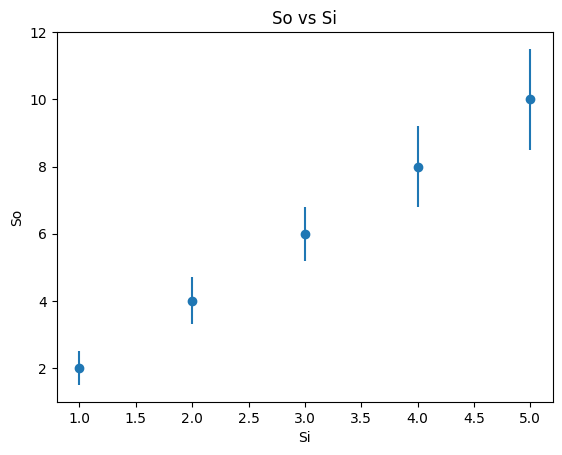

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
si = [1, 2, 3, 4, 5]
so = [2, 4, 6, 8, 10]
error = [0.5, 0.7, 0.8, 1.2, 1.5]

# Create the scatter plot
plt.scatter(si, so)

# Plot the error bars
plt.errorbar(si, so, yerr=error, fmt='none')

# Add labels and title
plt.xlabel('Si')
plt.ylabel('So')
plt.title('So vs Si')

# Show the plot
plt.show()